# Diabetes Prediction
#### Ruhit Debnath
Data Science Intern <br>
<b>CodersCave<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Key Findings:
### 1. Age: The dataset contains a wide range of ages, with a higher concentration of older adults.
### 2. Gender: The majority of individuals in the dataset are females, followed by males and others.
### 3. BMI: The distribution of BMI shows that a significant portion of individuals fall into the overweight and obese categories.
### 4. Hypertension and Heart Disease: There are individuals with hypertension and heart disease in the dataset, which are associated with an increased risk of diabetes.
### 5. Smoking History: The dataset includes information on smoking history, which can be a risk factor for diabetes.
### 6. HbA1c Level and Blood Glucose Level: Higher levels of HbA1c and blood glucose indicate a greater risk of diabetes.

# Preliminary Data Exploration

In [3]:
# Check the dimensions of the dataset
df.shape

(100000, 9)

In [4]:
# Preview the first few rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Use the info() function to get an overview of the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Calculate basic statistical measures using the describe() function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


# Data Cleaning and Hanfling Missing Values

In [7]:
# Identify missing values in the dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# Check duplicate records
duplicate_rows = df.duplicated()
duplicate_rows.sum()

3854

In [9]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

# Data Visualization

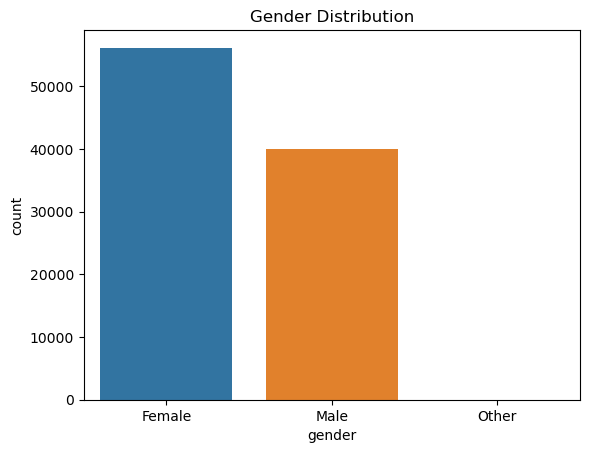

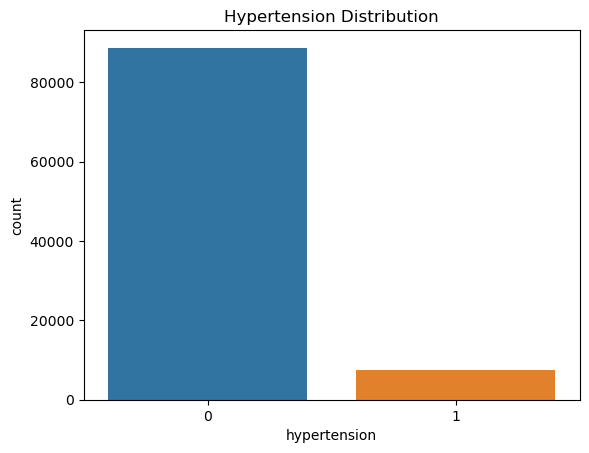

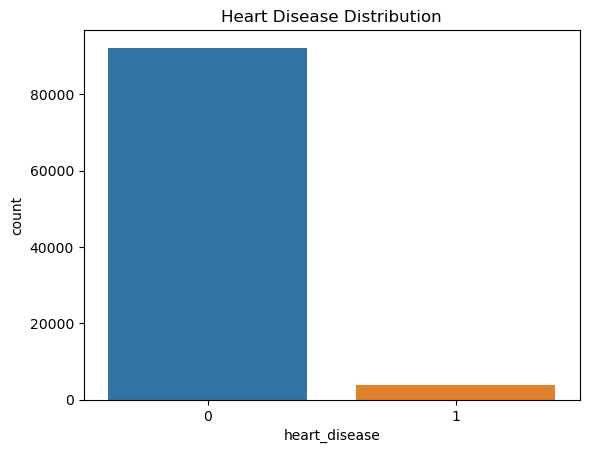

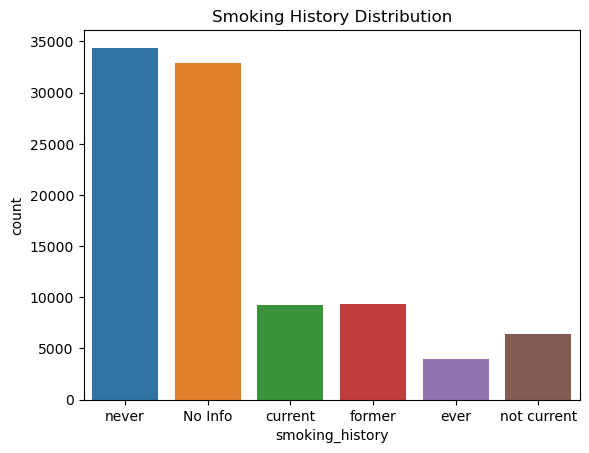

In [10]:
# Bar plots for categorical variabels
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x="hypertension", data=df)
plt.title("Hypertension Distribution")
plt.show()

sns.countplot(x="heart_disease", data=df)
plt.title("Heart Disease Distribution")
plt.show()

sns.countplot(x="smoking_history", data=df)
plt.title("Smoking History Distribution")
plt.show()

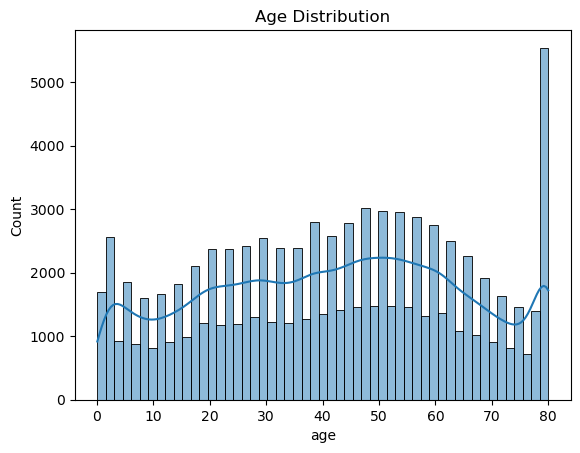

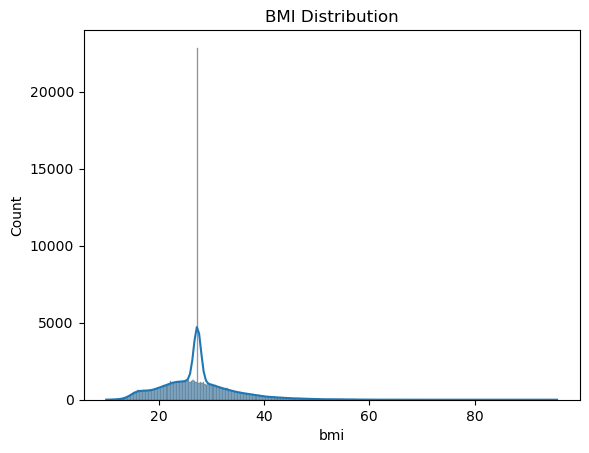

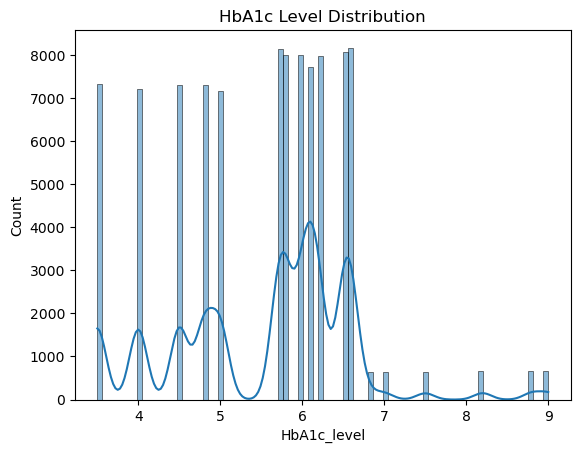

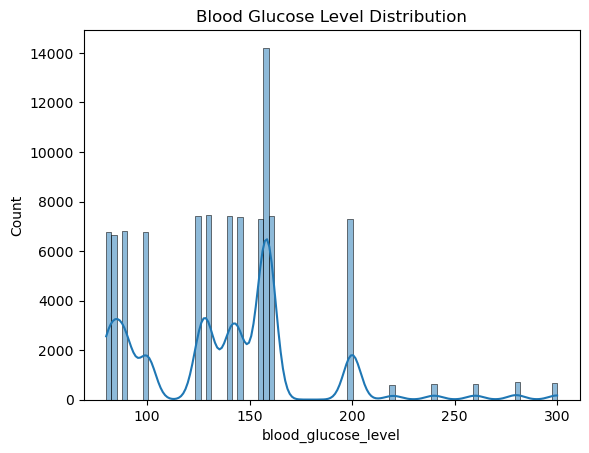

In [11]:
# Histograms for numeric variables
sns.histplot(x="age", data=df, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(x="bmi", data=df, kde=True)
plt.title("BMI Distribution")
plt.show()

sns.histplot(x="HbA1c_level", data=df, kde=True)
plt.title("HbA1c Level Distribution")
plt.show()

sns.histplot(x="blood_glucose_level", data=df, kde=True)
plt.title("Blood Glucose Level Distribution")
plt.show()

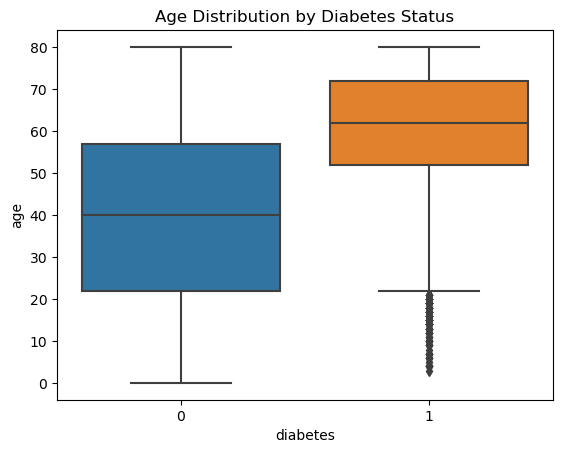

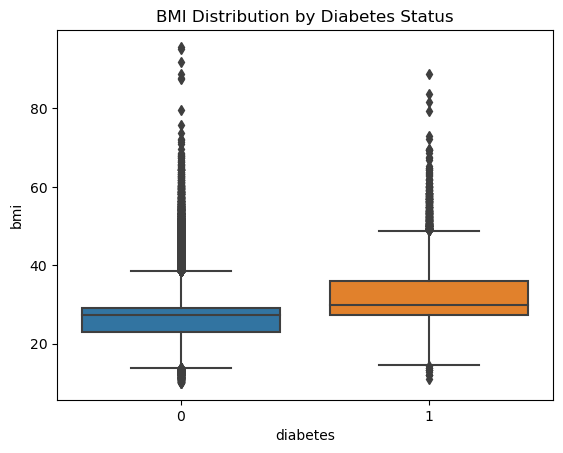

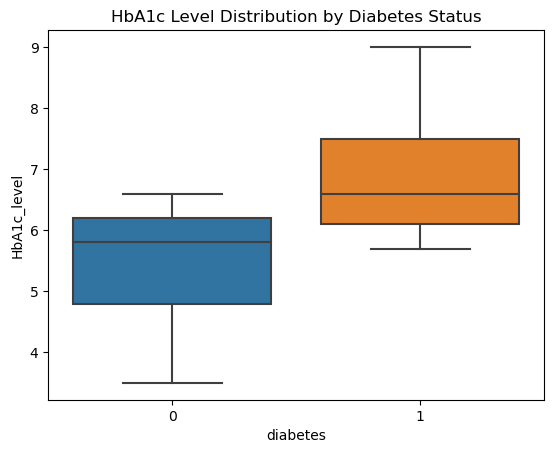

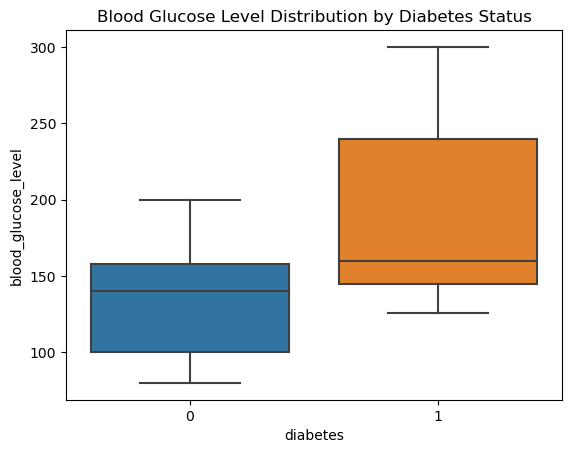

In [12]:
# Box plots for variables across different diabetes status
sns.boxplot(x="diabetes", y="age", data=df)
plt.title("Age Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="bmi", data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="HbA1c_level", data=df)
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="blood_glucose_level", data=df)
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.show()

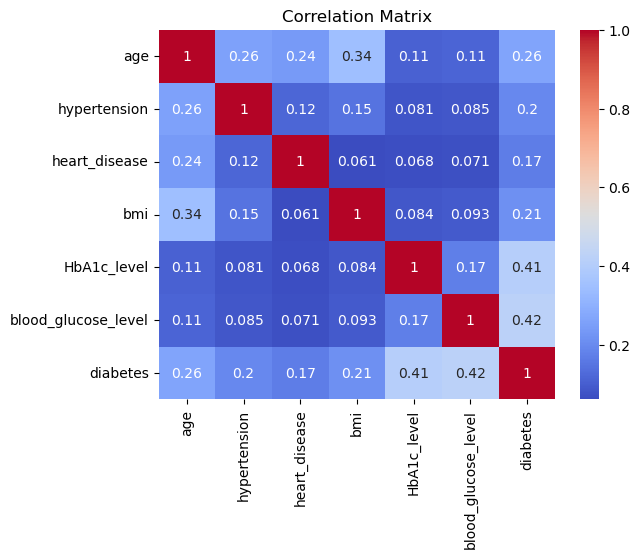

In [13]:
# Correlation matrix to visualize the correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [14]:
# Create a new feature: BMI Category
bins = [0, 18.5, 24.9, 29.9, float("inf")]
labels = ["underweight", "normal", "overweight", "obese"]
df["bmi_category"] = pd.cut(df["bmi"], bins=bins, labels=labels, right=False)

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
df["gender_encoded"] = label_encoder.fit_transform(df["gender"])
df["smoking_history_encoded"] = label_encoder.fit_transform(df["smoking_history"])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=["bmi_category"], drop_first=True)

# Print the updated DataFrame with new features
print(df_encoded.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  gender_encoded  \
0          6.6                  140         0               0   
1          6.6                   80         0               0   
2          5.7                  158         0               1   
3          5.0                  155         0               0   
4          4.8                  155         0               1   

   smoking_history_encoded  bmi_category_normal  bmi_category_overweight  \
0                        4                    0                        1   
1                        0    

# Statistical Analysis

In [15]:
# Compare variables across different diabetes status using t-tests
diabetes_positive = df[df["diabetes"] == 1]
diabetes_negative = df[df["diabetes"] == 0]

# Compare means of age for diabetes positive and negative groups
t_statistic, p_value = stats.ttest_ind(diabetes_positive["age"], diabetes_negative["age"])
print("T-Test - Age: t_statistic =", t_statistic, ", p_value =", p_value)

# Compare variables across different diabetes status using chi-square tests. Conduct chi-square test on gender and diabetes status
contingency_table = pd.crosstab(df['gender'], df['diabetes'])
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square Test - Gender and Diabetes: chi2_statistic =", chi2_statistic, ", p_value =", p_value)

T-Test - Age: t_statistic = 85.1901169664381 , p_value = 0.0
Chi-square Test - Gender and Diabetes: chi2_statistic = 139.3851343057988 , p_value = 5.4063313009771595e-31
